In [1]:
# k-NN is a very used algorithm which is not based on a statistical model (non-parametric).
# It is called "memory-based" because it is based only on the training dataset.
# And because it has to store in memory all training data it can be unconvenient for big size problems.
# k is the number of neighbors chosen and it cannot be learned by the algo. It is an hyperparameter.

In [20]:
# We use the MNIST dataset (images of handwritten digits) which can load thanks to Scikit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split 
from sklearn import neighbors 
from sklearn.metrics import confusion_matrix

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
print(mnist.data.shape) # data are 70k  28x28 (=784) pixels grayscale images (color from 0 to 255) 
print(mnist.target.shape) # target are the corresponding 70k annotation = digits from 0 to 9

(70000, 784)
(70000,)


In [5]:
# Data has dimension 28x28x1 = 784.
# If we had coloured images (R,G,B), dimension would have been 28x28x3 = 2352

In [6]:
# 70k is a huge sample (especially for k-NN which is quite slow), therefore we take a 
# representative (i.e. aleatory) sample of 5k:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]
# sampling randomly it is not the best way actually...we could have doubles and we should use the scikit 
# function sklearn.utils.resample (but for this exercise it's fine)

In [7]:
print(data.shape)
print(target.shape)

(5000, 784)
(5000,)


In [8]:
# We can now split our sample into training-set and testing-set (80% / 20%):
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [9]:
print(xtrain.shape)
print(ytrain.shape)

(4000, 784)
(4000,)


In [10]:
# we can now create our model using 3 neighbors and train it (i.e. fit) on the training-set
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain) # the training is stored in memory

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# Let's try to make a prediction on one entry of the test-set:
print(ytest[0])
knn.predict([xtest[0]]) # predicts expect a list []

4


array(['4'], dtype=object)

In [12]:
# We can test on the whole testing-set using .score instead of .predict which return the percentage 
# of success between 0 and 1 by comparing with the target, ytest
error = (1 - knn.score(xtest, ytest))*100
print('error = {} %'.format(error))

error = 7.399999999999995 %


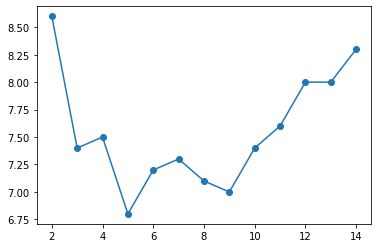

In [13]:
# For k-NN the only improvement we can do is to find the best hyperparameter k.
# We can loop on different k values and plot the error as a function of k:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k) # we create a model for every k
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest))) # we train and score at the same time
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [14]:
# we see that the best choice for the number of neighbors is k=3.
# We can now see some predictions for the best model:
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain) # we train the model

# We store the predictions
predicted = knn.predict(xtest)

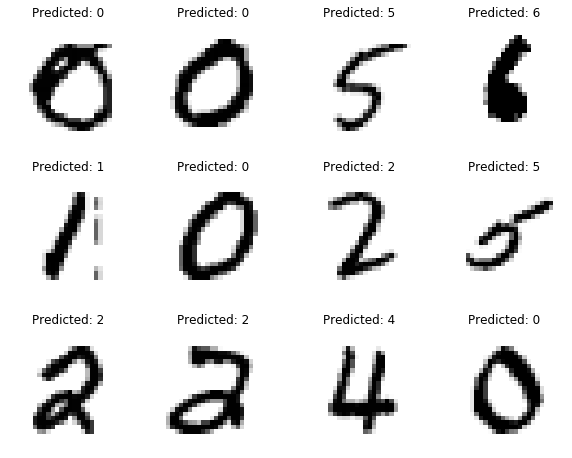

In [15]:
# We transform the data in form of images
images = xtest.reshape((-1, 28, 28))

# We randomly pick 12 images
select = np.random.randint(images.shape[0], size=12)

fig = plt.figure(figsize=(10,8))
# We plot the images with their prediction
for index, value in enumerate(select):
    fig.add_subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(predicted[value]))


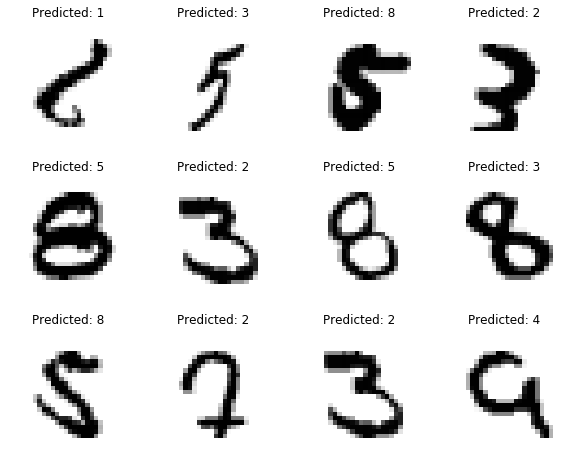

In [16]:
# To better understand the weaknesses of the model we can also plot the bad predictions:
# We collect the miscladdifications 
misclassified = (ytest != predicted)
misclassified_images = images[misclassified,:,:]
misclassified_predicted = predicted[misclassified]

# we pick up a random sample
select = np.random.randint(misclassified_images.shape[0], size=12)

# we print the images and the (wrong) predictions associated
fig = plt.figure(figsize=(10,8))
for index, value in enumerate(select):
    fig.add_subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclassified_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclassified_predicted[value]))

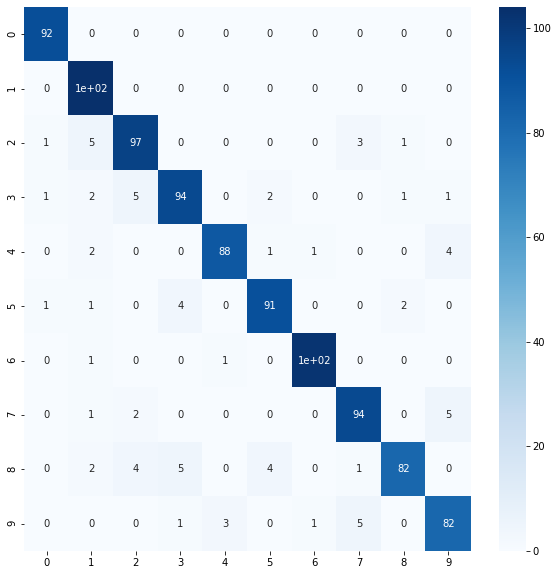

In [50]:
# On a more quantitative level we can plot the confusion matrix
cf_matrix = confusion_matrix(ytest, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True, cmap='Blues') # we do not use % because the sample is not homogeneusly distributed

In [ ]:
# kNN classifies handwritten digits pretty well